# Glycolysis

To construct a model of glycolysis, first we import  __masspy__ . 

In [1]:
import mass
from mass import (
    MassMetabolite, MassReaction, MassModel, Simulation, plot_simulation)

import matplotlib.pyplot as plt
%matplotlib inline

## Model Construction 

The first step of creating a model of glycolysis is to define the MassModel object. 

In [2]:
glycolysis = MassModel("Glycolysis")

### Metabolites

The next step is to define all of the metabolites in glycolysis using identifiers and the names found in the BiGG Database (http://bigg.ucsd.edu/). In order to ensure our model is physiologically accurate, it is important to provide the __formula__ keyword with a string representing the chemical formula for each metabolite, and the  __charge__ keyword with an integer representing the metabolite's ionic charge (Note that neutrally charged metabolites are provided with 0). To indicate that the cytosol is the cellular compartment in which glycolysis occurs, the string "c" is provided to the __compartment__ keyword. 

In this model of glycolysis, there are 20 metabolites inside the cytosol compartment. 

In [3]:
# Glycolytic Intermediates
glc__D_c = MassMetabolite(
    id="glc__D_c",
    name="D-Glucose",
    formula="C6H12O6",
    charge=0,
    compartment="c")
g6p_c = MassMetabolite(
    id="g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c")
f6p_c = MassMetabolite(
    id="f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c")
fdp_c = MassMetabolite(
    id="fdp_c",
    name="D-Fructose 1,6-bisphosphate",
    formula="C6H10O12P2",
    charge=-4,
    compartment="c")
dhap_c = MassMetabolite(
    id="dhap_c",
    name="Dihydroxyacetone phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c")
g3p_c = MassMetabolite(
    id="g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c")
_13dpg_c = MassMetabolite(
    id="_13dpg_c",
    name="3-Phospho-D-glyceroyl phosphate",
    formula="C3H4O10P2",
    charge=-4,
    compartment="c")
_3pg_c = MassMetabolite(
    id="_3pg_c",
    name="3-Phospho-D-glycerate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c")
_2pg_c = MassMetabolite(
    id="_2pg_c",
    name="D-Glycerate 2-phosphate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c")
pep_c = MassMetabolite(
    id="pep_c",
    name="Phosphoenolpyruvate",
    formula="C3H2O6P",
    charge=-3,
    compartment="c")
pyr_c = MassMetabolite(
    id="pyr_c",
    name="Pyruvate",
    formula="C3H3O3",
    charge=-1,
    compartment="c")
lac__L_c = MassMetabolite(
    id="lac__L_c",
    name="L-Lactate",
    formula="C3H5O3",
    charge=-1,
    compartment="c")
# Cofactors
nad_c = MassMetabolite(
    id="nad_c",
    name="Nicotinamide adenine dinucleotide",
    formula="C21H26N7O14P2",
    charge=-1,
    compartment="c")
nadh_c = MassMetabolite(
    id="nadh_c",
    name="Nicotinamide adenine dinucleotide - reduced",
    formula="C21H27N7O14P2",
    charge=-2,
    compartment="c")
atp_c = MassMetabolite(
    id="atp_c",
    name="ATP",
    formula="C10H12N5O13P3",
    charge=-4,
    compartment="c")
adp_c = MassMetabolite(
    id="adp_c",
    name="ADP",
    formula="C10H12N5O10P2",
    charge=-3,
    compartment="c")
amp_c = MassMetabolite(
    id="amp_c",
    name="AMP",
    formula="C10H12N5O7P",
    charge=-2,
    compartment="c")
h_c = MassMetabolite(
    id="h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c")
pi_c = MassMetabolite(
    id="pi_c",
    name="Phosphate",
    formula="HPO4",
    charge=-2,
    compartment="c")
h2o_c = MassMetabolite(
    id="h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c")

metabolite_list = [glc__D_c, g6p_c, f6p_c, fdp_c, dhap_c, 
                   g3p_c, _13dpg_c, _3pg_c, _2pg_c, pep_c,
                   pyr_c, lac__L_c, nad_c, nadh_c, atp_c, 
                   adp_c, amp_c, h_c, pi_c, h2o_c]

After generating the metabolites, all metabolites are added to the model.

In [4]:
glycolysis.add_metabolites(metabolite_list)

Because the character "c" represents the cytosol compartment, it is recommended to define and set the compartment in the __MassModel.compartments__ attribute.

In [5]:
glycolysis.compartments = {"c": "Cytosol"}
glycolysis.compartments

{'c': 'Cytosol'}

### Reactions

Once all of the MassMetabolite objects have been created for each metabolite in glycolysis, the next step is to define all of the reactions that occur inside the cytosol compartment using BiGG idenfifiers and reaction names. To make this model useful for integration with other models, it is important to provide the string "Glycolysis" to the __subsystem__ keyword. By providing the subsystem, the reactions can be easily obtained even when integrated with a significantly larger model. 

Note that after the creation of each MassReaction object, the metabolites are added to the reaction using a dictionary where keys are the metabolites and values are the stoichiometric coefficients (reactants have negative coefficients, products have positive ones). 

In this model of glycolysis, there are 14 reactions occuring inside the cytosol.

In [6]:
HEX1 = MassReaction(
    id="HEX1",
    name="Hexokinase (D-glucose:ATP)",
    subsystem="Glycolysis")
HEX1.add_metabolites({
    glc__D_c: -1,
    atp_c: -1,
    adp_c: 1,
    g6p_c: 1,
    h_c: 1})

PGI = MassReaction(
    id="PGI",
    name="Glucose-6-phosphate isomerase",
    subsystem="Glycolysis")
PGI.add_metabolites({
    g6p_c: -1,
    f6p_c: 1})

PFK = MassReaction(
    id="PFK",
    name="Phosphofructokinase",
    subsystem="Glycolysis")
PFK.add_metabolites({
    f6p_c: -1,
    atp_c: -1,
    fdp_c: 1,
    adp_c: 1,
    h_c: 1})

FBA = MassReaction(
    id="FBA",
    name="Fructose-bisphosphate aldolase",
    subsystem="Glyolysis")
FBA.add_metabolites({
    fdp_c: -1,
    dhap_c: 1,
    g3p_c: 1})

TPI = MassReaction(
    id="TPI",
    name="Triose-phosphate isomerase",
    subsystem="Glycolysis")
TPI.add_metabolites({
    dhap_c: -1,
    g3p_c: 1})

GAPD = MassReaction(
    id="GAPD",
    name="Glyceraldehyde-3-phosphate dehydrogenase",
    subsystem="Glycolysis")
GAPD.add_metabolites({
    g3p_c: -1,
    nad_c: -1,
    pi_c: -1,
    _13dpg_c: 1,
    h_c: 1,
    nadh_c: 1})

PGK = MassReaction(
    id="PGK",
    name="Phosphoglycerate kinase",
    subsystem="Glycolysis")
PGK.add_metabolites({
    _13dpg_c: -1,
    adp_c: -1,
    _3pg_c: 1,
    atp_c: 1})

PGM = MassReaction(
    id="PGM",
    name="Phosphoglycerate mutase",
    subsystem="Glycolysis")
PGM.add_metabolites({
    _3pg_c: -1,
    _2pg_c: 1})

ENO = MassReaction(
    id="ENO",
    name="Enolase",
    subsystem="Glycolysis")
ENO.add_metabolites({
    _2pg_c: -1,
    h2o_c: 1,
    pep_c: 1})

PYK = MassReaction(
    id="PYK",
    name="Pyruvate kinase",
    subsystem="Glycolysis")
PYK.add_metabolites({
    pep_c: -1,
    h_c: -1,
    adp_c: -1,
    atp_c: 1,
    pyr_c: 1})

LDH_L = MassReaction(
    id="LDH_L",
    name="L-lactate dehydrogenase",
    subsystem="Glycolysis")
LDH_L.add_metabolites({
    h_c: -1,
    nadh_c: -1,
    pyr_c: -1,
    lac__L_c: 1,
    nad_c: 1})

reaction_list = [HEX1, PGI, PFK, FBA, TPI, 
                 GAPD, PGK, PGM, ENO, PYK, 
                 LDH_L]

In addition to the reactions, the ATP maintenence reaction (ATPM), the Adenylate kinase reaction (ADK1), and the NADH demand reaction (DM_NADH) must also be included in the model. 

In [7]:
ADK1 = MassReaction(
    id="ADK1",
    name="Adenylate kinase",
    subsystem="Misc.")
ADK1.add_metabolites({
    adp_c: -2,
    amp_c: 1,
    atp_c: 1})

ATPM = MassReaction(
    id="ATPM",
    name="ATP maintenance requirement",
    subsystem="Pseudo", 
    reversible=False)
ATPM.add_metabolites({
    atp_c: -1,
    h2o_c: -1,
    adp_c: 1,
    h_c: 1,
    pi_c: 1})
DM_nadh = MassReaction(
    id="DM_nadh",
    name="Demand NADH",
    subsystem="Pseudo",
    reversible=False)
DM_nadh.add_metabolites({
    nadh_c: -1,
    nad_c: 1,
    h_c: 1})

reaction_list += [ADK1, ATPM, DM_nadh]

After generating the reactions, all reactions are added to the glycolysis model. Adding the MassReaction objects will also add their associated MassMetabolite objects if they have not already been added to the model. 

In [8]:
glycolysis.add_reactions(reaction_list)

### Exchange reactions

After generating the reactions, the next step is to add the exchange reactions and fix the concentrations of the external metabolites of the system. This can easily be done using the __MassModel.add_exchange__ method. With the generation of the exchange reactions, the character "e" is used to defined the "Extracellular" compartment. Therefore, it is recommended to add the definition to the __MassModel.compartment__ attribute. 

In this model of glycolysis, there are 8 exchange reactions.

In [9]:
S_glc__D_e = glycolysis.add_exchange(glc__D_c, exchange_type="source", 
                                      external_concentration=1)
EX_lac__L_e = glycolysis.add_exchange(lac__L_c, exchange_type="exchange", 
                                      external_concentration=1)
EX_pyr_e = glycolysis.add_exchange(pyr_c, exchange_type="exchange", 
                                      external_concentration=0.06)
EX_h_e = glycolysis.add_exchange(h_c, exchange_type="exchange", 
                                      external_concentration=6.30957e-05)
EX_h2o_e = glycolysis.add_exchange(h2o_c, exchange_type="exchange", 
                                      external_concentration=1)
S_amp_e = glycolysis.add_exchange(amp_c, exchange_type="source", 
                                      external_concentration=1)
DM_amp_e = glycolysis.add_exchange(amp_c, exchange_type="demand", 
                                      external_concentration=1)
EX_pi_e = glycolysis.add_exchange(pi_c, exchange_type="exchange", 
                                 external_concentration=2.5)

glycolysis

Name,Glycolysis
Memory address,0x011c4b3f28
Stoichiometric Matrix,20x22
Matrix Rank,19
Matrix Type,"dense, float64"
Number of Metabolites,20
Number of Reactions,22
Number of Initial Conditions,0
Number of Forward Rate Constants,0
Number of Equilibrium Constants,5
Number of Irreversible Reactions,5


### Optional: Ordering of internal species and reactions

Sometimes, it is also desirable to reorder the metabolite and reaction objects inside the model to follow the physiology. To reorder the internal species, one can use the method __cobra.DictList.get_by_any__ method with the list of metabolite identifiers in the desirable order. To ensure all metabolites are still present and not forgotten in the model, a QC/QA check is also performed. 

In [10]:
from cobra import DictList

In [11]:
new_metabolite_order = ["glc__D_c", "g6p_c", "f6p_c", "fdp_c", "dhap_c", 
                        "g3p_c", "_13dpg_c", "_3pg_c", "_2pg_c", "pep_c", 
                        "pyr_c", "lac__L_c", "nad_c", "nadh_c", "amp_c", 
                        "adp_c", "atp_c", "pi_c", "h_c", "h2o_c"]

if len(glycolysis.metabolites) == len(new_metabolite_order):
    glycolysis.metabolites = DictList(glycolysis.metabolites.get_by_any(new_metabolite_order))
    
new_reaction_order = ["HEX1", "PGI", "PFK", "FBA", "TPI", 
                      "GAPD", "PGK", "PGM", "ENO", "PYK", 
                      "LDH_L", "DM_amp_e", "ADK1", "EX_pyr_e", 
                      "EX_lac__L_e", "ATPM", "DM_nadh", "S_glc__D_e", 
                      "S_amp_e", "EX_h_e", "EX_h2o_e","EX_pi_e"]

if len(glycolysis.reactions) == len(new_reaction_order):
    glycolysis.reactions = DictList(glycolysis.reactions.get_by_any(new_reaction_order))
    
glycolysis.update_S(matrix_type="DataFrame")

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,...,ADK1,EX_pyr_e,EX_lac__L_e,ATPM,DM_nadh,S_glc__D_e,S_amp_e,EX_h_e,EX_h2o_e,EX_pi_e
glc__D_c,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
g6p_c,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f6p_c,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fdp_c,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dhap_c,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g3p_c,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_13dpg_c,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_3pg_c,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_2pg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Parameterization
### Steady State fluxes
Steady state fluxes can be computed as a summation of the MinSpan pathway vectors. 

Pathways are obtained using the minspan package (https://github.com/SBRG/minspan). 

Using these pathways and literature sources, independent fluxes can be defined in order to calculate the steady state flux vector. For this model, flux and concentration data are obtained from the historical human red blood cell (RBC) metabolic model (Heinrich 1977, Jamshidi 2002, Joshi 1988, Joshi 1990, Joshi 1989-II). 

From the literature, it is known that:

1. A typical uptake rate of the RBC of glucose is about 1.12 mM/hr. 
2. Based on experimental data, the steady state load on NADH is set at 20% of the glucose uptake rate, or $0.2 * 1.12 = 0.244. 
3. The synthesis rate of AMP is measured to be 0.014 mM/hr. 

With these pathays and numerical values, the steady state flux vector can be computed as the weighted sum of the corresponding basis vectors. The steady state flux vector is computed as an inner product:

In [12]:
minspan_paths = [
    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1, 0, 0, 1,-1, 0, 1, 0, 0, 2, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

glyc_ss_fluxes = glycolysis.compute_steady_state_fluxes(
                    minspan_paths, 
                    {S_glc__D_e: 1.12, DM_nadh: .2*1.12, DM_amp_e: 0.014},
                    update_reactions=True);

for rxn in glycolysis.reactions:
    print("%s: %s" % (rxn.id, rxn.ssflux))

HEX1: 1.12
PGI: 1.12
PFK: 1.12
FBA: 1.12
TPI: 1.12
GAPD: 2.24
PGK: 2.24
PGM: 2.24
ENO: 2.24
PYK: 2.24
LDH_L: 2.016
DM_amp_e: 0.014
ADK1: 0.0
EX_pyr_e: 0.22400000000000003
EX_lac__L_e: 2.016
ATPM: 2.24
DM_nadh: 0.22400000000000003
S_glc__D_e: 1.12
S_amp_e: 0.014
EX_h_e: 2.688
EX_h2o_e: 0.0
EX_pi_e: 0.0


### Initial Conditions

Once the network has been built, the concentrations can be added to the metabolites. The cytosolic metabolite concentrations are added to each individual metabolite using the __MassMetabolite.initial_condition__ or __MassMetabolite.ic__  setter methods. Once added, the __MassModel.set_initial_conditions__ method is used to add the initial conditions into the MassModel object itself. 


In [13]:
glc__D_c.ic = 1.0
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
fdp_c.ic = 0.0146
g3p_c.ic = 0.00728
dhap_c.ic = 0.16
_13dpg_c.ic = 0.000243
_3pg_c.ic = 0.0773
_2pg_c.ic = 0.0113
pep_c.ic = 0.017
pyr_c.ic = 0.060301
lac__L_c.ic = 1.36
atp_c.ic = 1.6
adp_c.ic = 0.29
amp_c.ic = 0.0867281
h_c.ic = 0.0000899757
nad_c.ic = 0.0589
nadh_c.ic = 0.0301
pi_c.ic = 2.5
h2o_c.ic = 1.0

glycolysis.set_initial_conditions()

### Equilibirum Constants

After adding initial conditions and steady state fluxes, the equilibrium constants  are defined using the __MassReaction.equilibrium_constant__ or __MassReaction.Keq__ setter methods. 

In [14]:
# Cytosolic reactions
HEX1.Keq = 850
PGI.Keq = 0.41
PFK.Keq = 310
FBA.Keq = 0.082
TPI.Keq = 0.0571429
GAPD.Keq = 0.0179
PGK.Keq = 1800
PGM.Keq = 0.147059
ENO.Keq = 1.69492
PYK.Keq = 363000
LDH_L.Keq = 26300
ADK1.Keq = 1.65

#Excahnges
EX_lac__L_e.Keq = 1
EX_pyr_e.Keq = 1
EX_h_e.Keq = 1
EX_h2o_e.Keq = 1
EX_pi_e.Keq = 1

### Calculation of PERCs
By defining the equilibrium constant and steady state parameters, the values of the pseudo rate constants (PERCs) can be calculated and added to the model using the __MassModel.calc_PERCS__ method.

In [15]:
percs = glycolysis.calculate_PERCs(update_reactions=True);
for rxn_kf, perc in percs.items():
    print("%s: %.3f" % (rxn_kf, perc))

kf_HEX1: 0.700
kf_PGI: 3644.444
kf_PFK: 35.369
kf_FBA: 2834.568
kf_TPI: 34.356
kf_GAPD: 3376.749
kf_PGK: 1273531.270
kf_PGM: 4868.589
kf_ENO: 1763.741
kf_PYK: 454.386
kf_LDH_L: 1112.574
kf_DM_amp_e: 0.161
kf_ADK1: 100000.000
kf_EX_pyr_e: 744.186
kf_EX_lac__L_e: 5.600
kf_ATPM: 1.400
kf_DM_nadh: 7.442
kf_S_glc__D_e: 1.120
kf_S_amp_e: 0.014
kf_EX_h_e: 100000.000
kf_EX_h2o_e: 100000.000
kf_EX_pi_e: 100000.000


From literature, it is known that the rate of the phosphate uptake is 0.23/sec. Therefore, the PERC for the phosphate exchange is updated manually:

In [16]:
EX_pi_e.kf = 0.23*3600

### Optional Information: Storing references
#### Units
All of the units for the numerical values used in this model are "Millimoles" for amount, "Liters" for volume, and "Hours" for time. In order to ensure that future users understand the numerical values for model, it is important to define the __MassModel.units__ attribute. Like the __compartment__ attribute, the __units__ attribute is a dictionary and can easily be updated using the same method.

Note that this attribute will NOT track units, but instead acts as a reference for the user and others if they need to perform unit conversions.

In [17]:
glycolysis.units = {'N': 'Millimoles', 
                    'Vol': 'Liters',
                    'Time': 'Hours'}
glycolysis.units

{'N': 'Millimoles', 'Vol': 'Liters', 'Time': 'Hours'}

#### Literature

Because specific sources of literature were used in the building of this model, it is important for others who wish to use this model to be able to access those same literature sources. In general, to preserve information for users, either the __notes__ attribute or the __annotation__ attribute can be used. In this case, the literature source is placed in __notes__. 

In [18]:
glycolysis.notes.update({"Literature": 
    ["R. Heinrich, S. M. Rapoport, and T. A. Rapoport. Metabolic regulations and mathematical models. Prog. Biophys. Molec. Biol., 32:1–82, 1977.",
     "A. Joshi. Integrated Metabolic Dynamics in the Human Red Blood Cell. PhD thesis, University of Michigan, 1988.",
     "N. Jamshidi, S.J. Wiback, and B.O. Palsson. In silico model-driven assess- ment of the effects of single nucleotide polymorphisms (SNPs) on human red blood cell metabolism. Genome Research, 12:1687–1692, 2002.,"
     "A. Joshi. Integrated Metabolic Dynamics in the Human Red Blood Cell. PhD thesis, University of Michigan, 1988.",
     "A. Joshi and B.O. Palsson. Metabolic dynamics in the human red cell. Part IV–data prediction and some model computations. J. theor. Biol., 142:69–85, 1990.",
     "A. Joshi and B.O. Palsson. Metabolic dynamics in the human red cell. Part I I –interactions with the environment. J. theor. Biol., 141:529–545, 1989.",
     "Prankerd, T. A. J., & Altman, K. I. (1954). A study of the metabolism of phosphorus in mammalian red cells. Biochemical Journal, 58(4), 622–633."
    ]})
glycolysis.notes

{'Literature': ['R. Heinrich, S. M. Rapoport, and T. A. Rapoport. Metabolic regulations and mathematical models. Prog. Biophys. Molec. Biol., 32:1–82, 1977.',
  'A. Joshi. Integrated Metabolic Dynamics in the Human Red Blood Cell. PhD thesis, University of Michigan, 1988.',
  'N. Jamshidi, S.J. Wiback, and B.O. Palsson. In silico model-driven assess- ment of the effects of single nucleotide polymorphisms (SNPs) on human red blood cell metabolism. Genome Research, 12:1687–1692, 2002.,A. Joshi. Integrated Metabolic Dynamics in the Human Red Blood Cell. PhD thesis, University of Michigan, 1988.',
  'A. Joshi and B.O. Palsson. Metabolic dynamics in the human red cell. Part IV–data prediction and some model computations. J. theor. Biol., 142:69–85, 1990.',
  'A. Joshi and B.O. Palsson. Metabolic dynamics in the human red cell. Part I I –interactions with the environment. J. theor. Biol., 141:529–545, 1989.',
  'Prankerd, T. A. J., & Altman, K. I. (1954). A study of the metabolism of phospho

## QC/QA Model

Before we simulate the model, it is important to ensure that the model is elementally balanced, and that the model can simulate. Therefore, the __qcqa_model__ method is used to provide a report on the model quality and indicate whether simulation is possible and if not, what parameters and/or initial conditions are missing. 

__Note:__ Typically exchange and demand reactions are necessarily elementally balanced and therefore should not generally be a cause for concern. Because the NADH reaction generates electrons for processes that use redox potential, it is expected to not be balanced.

In [19]:
mass.qcqa_model(glycolysis, parameters=True, concentrations=True, 
                fluxes=True, superfluous=True, elemental=True)

╒══════════════════════════════════════════════╕
│ MODEL ID: Glycolysis                         │
│ SIMULATABLE: True;                           │
│ NUMERICAL CONSISTENCY: True                  │
╞══════════════════════════════════════════════╡
│ ============================================ │
│             CONSISTENCY CHECKS               │
│ ============================================ │
│ Elemental                                    │
│ ---------------------------------            │
│ DM_nadh: {charge: 2.0} unbalanced            │
│ ============================================ │
╘══════════════════════════════════════════════╛


From the results of the QC/QA test, it can be seen that the model can be simulated and is numerically consistent.

## Steady State and Model Validation 

To find the steady state of the model, the __Simulation.find_steady_state_model__ method can used, and the 
__Simulation.update_values__ will update the values in the Simulation object with the steady state values. 
To validate the steady state of the model, concentration and flux solutions can be plotted using the __plot_simulation__ function.

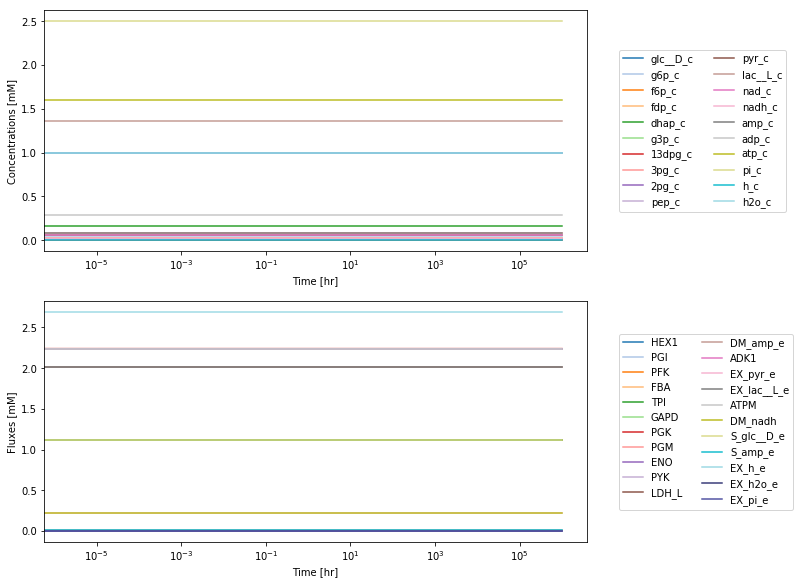

In [20]:
sim = Simulation(glycolysis)

t0, tf = (0, 1e6)
conc_sol, flux_sol = sim.simulate_model(glycolysis, time=(t0, tf))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 8), constrained_layout=True);

plot_simulation(conc_sol, ax=ax1, legend="right outside",
                plot_function="semilogx", xlabel="Time [hr]",
                ylabel="Concentrations [mM]");

plot_simulation(flux_sol, ax=ax2, legend="right outside",
                plot_function="semilogx", xlabel="Time [hr]",
                ylabel="Fluxes [mM]");

## Export

After validation, the model is ready to be saved. The model can either be exported as a ".json" file or if the model conforms to SBML standards, as a ".xml" file using the classes in __mass.io__. To export the model, only the path to the directory and the name of the model need to be specified. Both are shown. 

In [21]:
from mass.io import json#, sbml

### Export using JSON

In [22]:
json.save_json_model(filename="../models/json_models/glycolysis.json", model=glycolysis)

### Export using SBML

In [23]:
# sbml.write_sbml_model(filename="../models/sbml_models/glycolysis.xml", model=glycolysis)